<a href="https://colab.research.google.com/github/Raj-666/Machine-Learning-Project/blob/main/Student_Dropout_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
print(df.shape)

Saving data.csv to data (2).csv
(4424, 1)


In [ ]:
#Cleaning
df = pd.read_csv("data.csv", delimiter=';')
df.columns = df.columns.str.strip().str.replace('"', '').str.replace("'", "")
print ('The description of the dataset is given below:-')
info = df.info()
info
decs = df.describe()
decs
head = df.head()
head

The description of the dataset is given below:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mothers qualification                           4424 non-null   int64 

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Distribution of Target (Dropout Status)


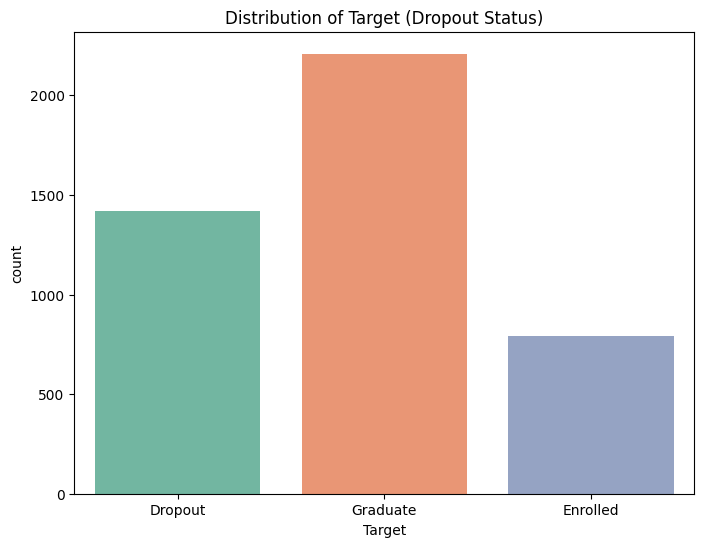

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target', hue='Target', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Target (Dropout Status)')
plt.show()


# Gender and Dropout Rates by Scholarship Holder

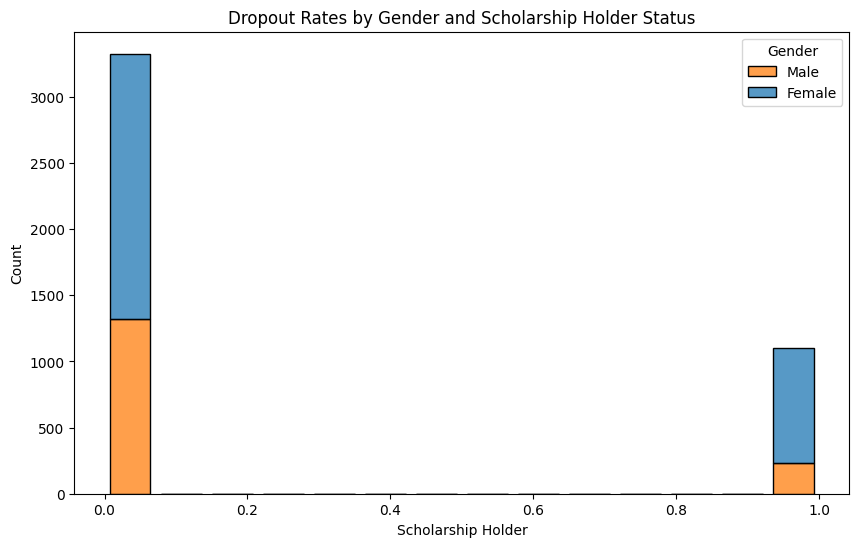

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Scholarship holder", hue="Gender", multiple="stack", shrink=0.8)
plt.title("Dropout Rates by Gender and Scholarship Holder Status")
plt.xlabel("Scholarship Holder")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()


# Calculate dropout rate for each Marital status category

<ipython-input-58-07c68d3f858f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_rates.index, y=dropout_rates.values, palette="Pastel1")


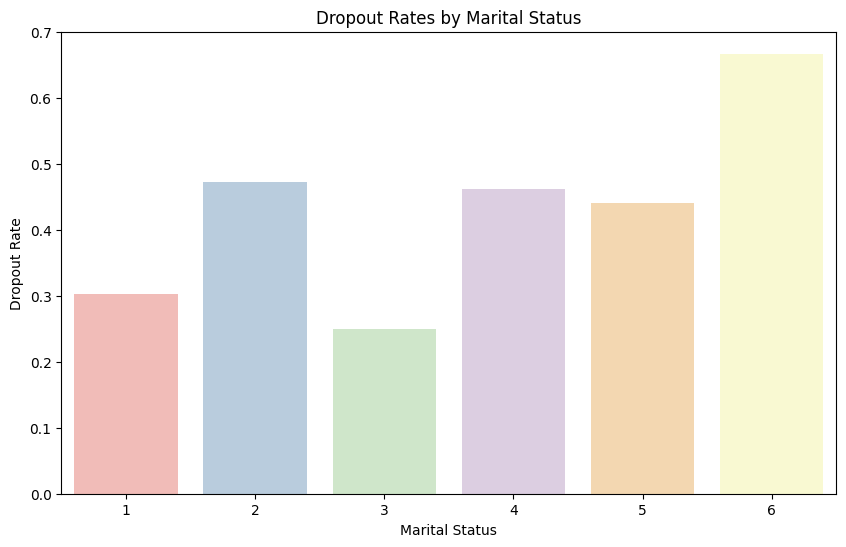

In [ ]:
# Convert 'Target' to numeric: 1 for Dropout, 0 for others
df['Target_Numeric'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)
dropout_rates = df.groupby('Marital status')['Target_Numeric'].mean()  # Mean of Target_Numeric gives dropout rate

# Plot the dropout rates for each Marital status
plt.figure(figsize=(10, 6))
sns.barplot(x=dropout_rates.index, y=dropout_rates.values, palette="Pastel1")
plt.title("Dropout Rates by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Dropout Rate")
plt.show()

# Dropout Rates by Socioeconomic Indicators

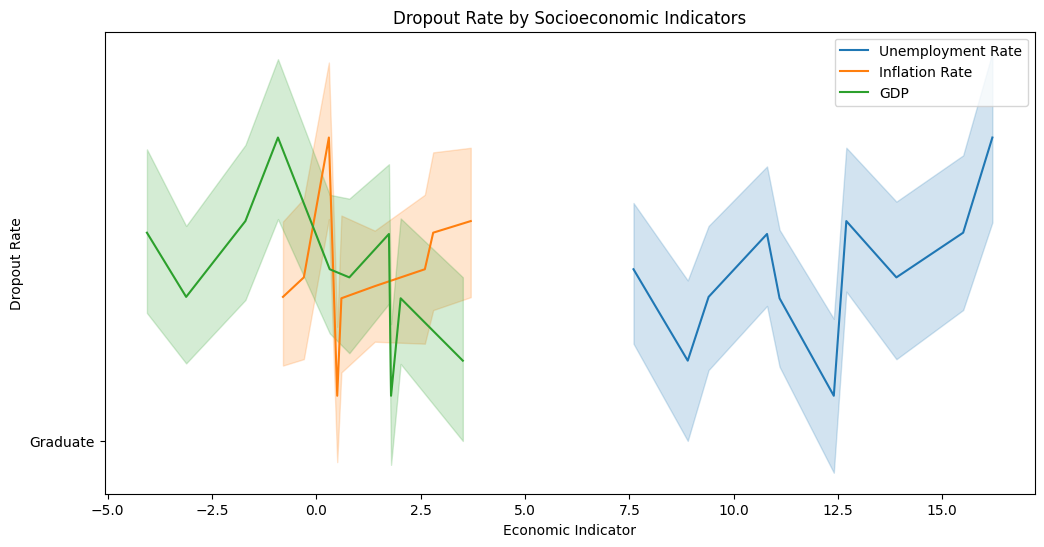

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Unemployment rate", y="Target", label="Unemployment Rate")
sns.lineplot(data=df, x="Inflation rate", y="Target", label="Inflation Rate")
sns.lineplot(data=df, x="GDP", y="Target", label="GDP")
plt.title("Dropout Rate by Socioeconomic Indicators")
plt.xlabel("Economic Indicator")
plt.ylabel("Dropout Rate")
plt.legend()
plt.show()


# Correlation matrix of Academic Factors

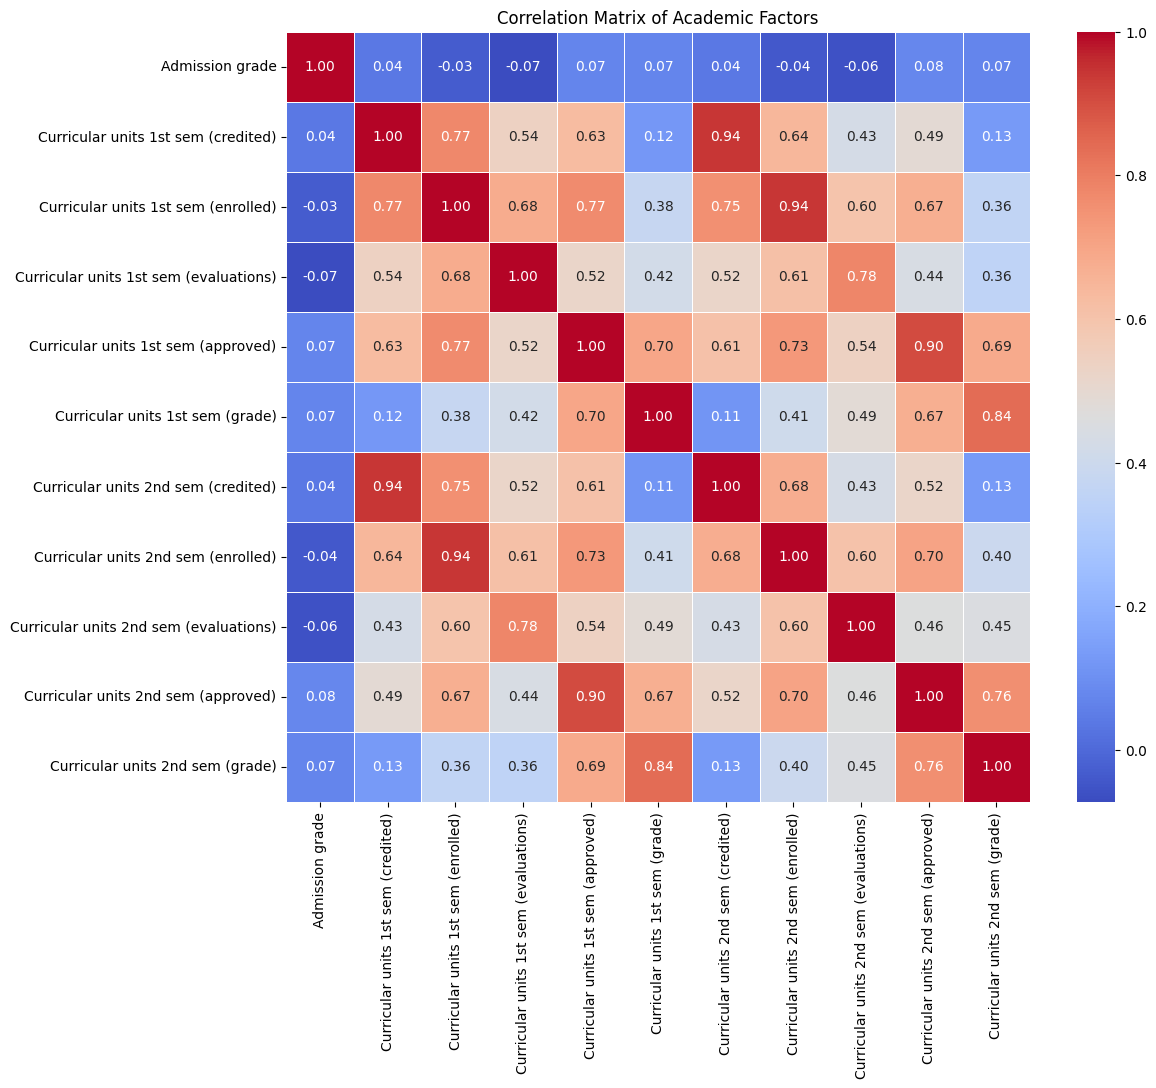

In [ ]:
# Select academic-related columns for the correlation matrix
academic_columns = [
    'Admission grade',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)'
]

# Select only the academic columns from the dataframe
academic_df = df[academic_columns].copy()

# Check for missing values and handle them
academic_df = academic_df.dropna()

# Calculate correlation matrix for academic columns
correlation_matrix = academic_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Academic Factors")
plt.show()


# Total count of missing values in the DataFrame

In [ ]:
total_missing = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing)


Total missing values in the DataFrame: 0


In [ ]:
# Selecting the correct socio-economic features based on the actual column names
socio_economic_features = ['Fathers occupation', 'Mothers occupation', 'Fathers qualification',
                            'Mothers qualification', 'Tuition fees up to date', 'Scholarship holder',
                            'Nacionality', 'Marital status', 'Age at enrollment']

X_socio = df[socio_economic_features]
y_socio = df['Target']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
le = LabelEncoder()
df['Scholarship holder'] = le.fit_transform(df['Scholarship holder'])
df['Tuition fees up to date'] = le.fit_transform(df['Tuition fees up to date'])
df['Target'] = le.fit_transform(df['Target'])

# One-hot encoding for other categorical columns
df = pd.get_dummies(df, columns=['Fathers occupation', 'Mothers occupation', 'Fathers qualification',
                                 'Mothers qualification', 'Nacionality', 'Marital status'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_socio, y_socio, test_size=0.2, random_state=42)


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Accuracy and Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 60.00%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

     Dropout       0.74      0.47      0.58       316
    Enrolled       0.50      0.01      0.01       151
    Graduate       0.56      0.91      0.69       418

    accuracy                           0.60       885
   macro avg       0.60      0.46      0.43       885
weighted avg       0.61      0.60      0.54       885



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Accuracy and Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 46.44%
Classification Report for Decision Tree:
               precision    recall  f1-score   support

     Dropout       0.51      0.47      0.49       316
    Enrolled       0.17      0.19      0.18       151
    Graduate       0.54      0.56      0.55       418

    accuracy                           0.46       885
   macro avg       0.41      0.41      0.41       885
weighted avg       0.47      0.46      0.47       885



# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy and Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 53.90%
Classification Report for Random Forest:
               precision    recall  f1-score   support

     Dropout       0.62      0.52      0.57       316
    Enrolled       0.19      0.15      0.17       151
    Graduate       0.57      0.69      0.63       418

    accuracy                           0.54       885
   macro avg       0.46      0.45      0.45       885
weighted avg       0.53      0.54      0.53       885



# Plotting confusion matrix for each model

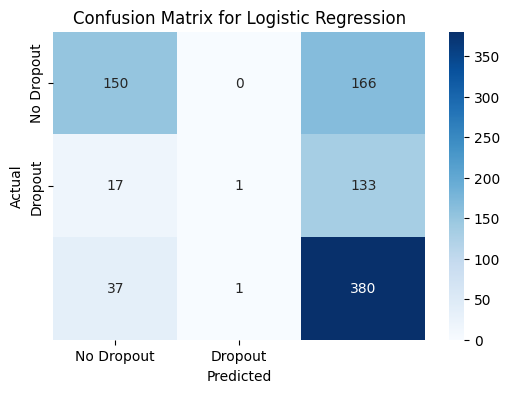

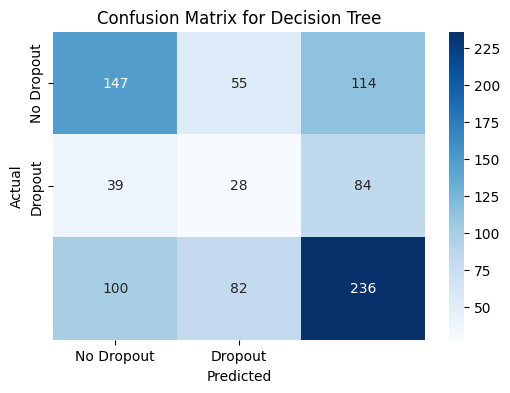

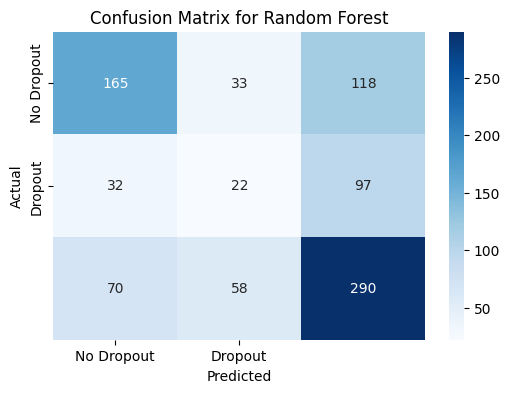

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


In [ ]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)

# For Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

# For Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)


Logistic Regression Confusion Matrix:
[[150   0 166]
 [ 17   1 133]
 [ 37   1 380]]
Decision Tree Confusion Matrix:
[[147  55 114]
 [ 39  28  84]
 [100  82 236]]
Random Forest Confusion Matrix:
[[165  33 118]
 [ 32  22  97]
 [ 70  58 290]]


In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.47      0.58       316
    Enrolled       0.50      0.01      0.01       151
    Graduate       0.56      0.91      0.69       418

    accuracy                           0.60       885
   macro avg       0.60      0.46      0.43       885
weighted avg       0.61      0.60      0.54       885

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Dropout       0.51      0.47      0.49       316
    Enrolled       0.17      0.19      0.18       151
    Graduate       0.54      0.56      0.55       418

    accuracy                           0.46       885
   macro avg       0.41      0.41      0.41       885
weighted avg       0.47      0.46      0.47       885

Random Forest Classification Report:
              precision    recall  f1-score   support

     Dropout       0.62      0.52      0.57       316
    Enrolled

# **Analysis of Classification Reports**

1. Logistic Regression:
Precision:

Dropout: 0.74 — The model is relatively accurate when predicting students who will drop out.
Enrolled: 0.50 — Half of the predicted "Enrolled" students were correctly identified, but a significant portion is incorrect.
Graduate: 0.56 — The model is somewhat accurate for predicting students who graduate, but there’s room for improvement.
Recall:

Dropout: 0.47 — This means the model is missing 53% of the actual dropouts. It's not capturing all dropout cases well.
Enrolled: 0.01 — The model only identified 1% of the enrolled students correctly. This is very poor.
Graduate: 0.91 — The model is very good at predicting graduates, with a high recall for this class.
F1-Score:

Dropout: 0.58 — Reasonable, but not optimal for dropout prediction.
Enrolled: 0.01 — Very poor, reflecting the poor recall for "Enrolled" students.
Graduate: 0.69 — Good for the graduate category, but the model could still improve.
Overall Accuracy: 60% — The model does fairly well but is skewed due to the poor performance on predicting "Enrolled" students.

2. Decision Tree:
Precision:

Dropout: 0.51 — Slightly worse than Logistic Regression, but still moderate.
Enrolled: 0.17 — Very poor, as the Decision Tree doesn't identify many enrolled students correctly.
Graduate: 0.54 — Similar to dropout, performance for graduates is not strong.
Recall:

Dropout: 0.47 — Same as Logistic Regression, the model is missing a significant portion of dropouts.
Enrolled: 0.19 — Again, very poor recall, meaning it fails to capture most of the enrolled students.
Graduate: 0.56 — Better than the other categories, but not good enough.
F1-Score:

Dropout: 0.49 — A low score, reflecting that the model is not performing well for dropout prediction.
Enrolled: 0.18 — Extremely low, showing that it's largely failing to predict enrolled students correctly.
Graduate: 0.55 — Better for graduate prediction but still lacking.
Overall Accuracy: 46.66% — The Decision Tree performs the worst among all three models.

3. Random Forest:
Precision:

Dropout: 0.62 — Better than Decision Tree and Logistic Regression for dropout predictions.
Enrolled: 0.19 — Similar to Decision Tree, the model struggles with predicting enrolled students.
Graduate: 0.57 — Close to Logistic Regression's performance for graduate prediction.
Recall:

Dropout: 0.52 — Slightly better than Logistic Regression, but still missing more than 40% of the dropouts.
Enrolled: 0.15 — Very poor, indicating the model fails to predict enrolled students well.
Graduate: 0.69 — Same as Logistic Regression, good recall for graduates.
F1-Score:

Dropout: 0.57 — Moderately good, but not ideal for dropout prediction.
Enrolled: 0.17 — Very low, reflecting poor prediction of enrolled students.
Graduate: 0.63 — Decent, similar to Logistic Regression.
Overall Accuracy: 54% — The Random Forest model performs better than the Decision Tree but still lags behind Logistic Regression.

